In [2]:
import numpy as np
import pandas as pd
from datetime import datetime

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# Time Series
mempelajari cara manipulasi data di pandas bertipe datetime

In [5]:
# pd.date_range untuk membuat tanggalan urut

tanggalan = pd.date_range(start="01/01/2019", end="09/14/2022", freq="D")
tanggalan

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10',
               ...
               '2022-09-05', '2022-09-06', '2022-09-07', '2022-09-08',
               '2022-09-09', '2022-09-10', '2022-09-11', '2022-09-12',
               '2022-09-13', '2022-09-14'],
              dtype='datetime64[ns]', length=1353, freq='D')

In [6]:
# bikin data pura pura hasil jualan setiap harinya

sales = np.random.randint(0, 2000, len(tanggalan))
sales

array([1635,  177,  307, ...,  291,  274, 1356])

In [7]:
# gabungin jadi sebuah dataframe, dummy data, data pura2 hasil jualan per hari

df_sales = pd.DataFrame({"date":tanggalan, "qty":sales})
df_sales

,date,qty
0,2019-01-01,1635
1,2019-01-02,177
2,2019-01-03,307
3,2019-01-04,1388
4,2019-01-05,172
...,...,...
1348,2022-09-10,1268
1349,2022-09-11,1586
1350,2022-09-12,291
1351,2022-09-13,274


In [8]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1353 entries, 0 to 1352
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1353 non-null   datetime64[ns]
 1   qty     1353 non-null   int32         
dtypes: datetime64[ns](1), int32(1)
memory usage: 16.0 KB


In [9]:
# jika tipe data untuk kolom tanggal belum datetime, kita perlu convert dulu menggunakan
# pd.to_datetime

In [10]:
# set index ke tanggalan

df_sales = df_sales.set_index("date")
df_sales

,qty
date,
2019-01-01,1635
2019-01-02,177
2019-01-03,307
2019-01-04,1388
2019-01-05,172
...,...
2022-09-10,1268
2022-09-11,1586
2022-09-12,291


In [16]:
tanggal = df_sales.index[0]
tanggal

Timestamp('2019-01-01 00:00:00')

In [17]:
# strftime, datetime --> string dengan format yang kita pilih
datetime.strftime(tanggal, "%a %d %b %Y")

'Tue 01 Jan 2019'

In [18]:
# strptime, string --> datetime, pastikan format string sudah sesuai
datetime.strptime("01/02/2019", "%d/%m/%Y")

datetime.datetime(2019, 2, 1, 0, 0)

In [20]:
# mengubah banyak tanggalan sekaligus juga bisa
dates = [datetime.strftime(tgl, "%a %d %b %Y") for tgl in df_sales.index]
dates

['Tue 01 Jan 2019',
 'Wed 02 Jan 2019',
 'Thu 03 Jan 2019',
 'Fri 04 Jan 2019',
 'Sat 05 Jan 2019',
 'Sun 06 Jan 2019',
 'Mon 07 Jan 2019',
 'Tue 08 Jan 2019',
 'Wed 09 Jan 2019',
 'Thu 10 Jan 2019',
 'Fri 11 Jan 2019',
 'Sat 12 Jan 2019',
 'Sun 13 Jan 2019',
 'Mon 14 Jan 2019',
 'Tue 15 Jan 2019',
 'Wed 16 Jan 2019',
 'Thu 17 Jan 2019',
 'Fri 18 Jan 2019',
 'Sat 19 Jan 2019',
 'Sun 20 Jan 2019',
 'Mon 21 Jan 2019',
 'Tue 22 Jan 2019',
 'Wed 23 Jan 2019',
 'Thu 24 Jan 2019',
 'Fri 25 Jan 2019',
 'Sat 26 Jan 2019',
 'Sun 27 Jan 2019',
 'Mon 28 Jan 2019',
 'Tue 29 Jan 2019',
 'Wed 30 Jan 2019',
 'Thu 31 Jan 2019',
 'Fri 01 Feb 2019',
 'Sat 02 Feb 2019',
 'Sun 03 Feb 2019',
 'Mon 04 Feb 2019',
 'Tue 05 Feb 2019',
 'Wed 06 Feb 2019',
 'Thu 07 Feb 2019',
 'Fri 08 Feb 2019',
 'Sat 09 Feb 2019',
 'Sun 10 Feb 2019',
 'Mon 11 Feb 2019',
 'Tue 12 Feb 2019',
 'Wed 13 Feb 2019',
 'Thu 14 Feb 2019',
 'Fri 15 Feb 2019',
 'Sat 16 Feb 2019',
 'Sun 17 Feb 2019',
 'Mon 18 Feb 2019',
 'Tue 19 Feb 2019',


In [27]:
# buat kolom baru untuk weekday
df_sales["day"] = df_sales.index.weekday
df_sales

,qty,day
date,,
2019-01-01,1635,1
2019-01-02,177,2
2019-01-03,307,3
2019-01-04,1388,4
2019-01-05,172,5
...,...,...
2022-09-10,1268,5
2022-09-11,1586,6
2022-09-12,291,0


In [30]:
df_sales["day"] = df_sales["day"].replace({
        0: "Sunday", 1:"Monday", 2:"Tuesday", 3:"Wednesday", 4:"Thursday", 5:"Friday", 6:"Saturday"
    })
df_sales

,qty,day
date,,
2019-01-01,1635,Monday
2019-01-02,177,Tuesday
2019-01-03,307,Wednesday
2019-01-04,1388,Thursday
2019-01-05,172,Friday
...,...,...
2022-09-10,1268,Friday
2022-09-11,1586,Saturday
2022-09-12,291,Sunday


In [31]:
# Query
# ambil tanggal tertentu, hari tertentu, bulan tertentu, atau tahun tertentu

# misal ambil khusus hari minggu
kondisi = (df_sales.index.weekday == 0)
df_sales_minggu = df_sales[kondisi]
df_sales_minggu

,qty,day
date,,
2019-01-07,92,Sunday
2019-01-14,305,Sunday
2019-01-21,326,Sunday
2019-01-28,161,Sunday
2019-02-04,1316,Sunday
...,...,...
2022-08-15,1504,Sunday
2022-08-22,1147,Sunday
2022-08-29,1480,Sunday


In [32]:
# drop kolom day
df_sales.drop(columns=["day"], inplace=True)

In [37]:
# Query
# bisa juga dengan bulan tertentu
df_sales_sept = df_sales[df_sales.index.month == 9]
print(df_sales_sept.index.month.unique())
df_sales_sept

Int64Index([9], dtype='int64', name='date')


,qty
date,
2019-09-01,549
2019-09-02,977
2019-09-03,705
2019-09-04,1631
2019-09-05,998
...,...
2022-09-10,1268
2022-09-11,1586
2022-09-12,291


In [39]:
# resampling
# data kita banyak, kita mau lihat trend bulan ke bulan
# mirip groupby tapi untuk tanggalan,
#  setelah gabungin data per bulan, datanya mau di agregasi seperti apa - total, rata2, median,...?
df_sales.resample('M').sum()

,qty
date,
2019-01-31,24617
2019-02-28,29128
2019-03-31,26385
2019-04-30,27914
2019-05-31,36316
2019-06-30,35222
2019-07-31,36882
2019-08-31,25876
2019-09-30,31431


<AxesSubplot:xlabel='date'>

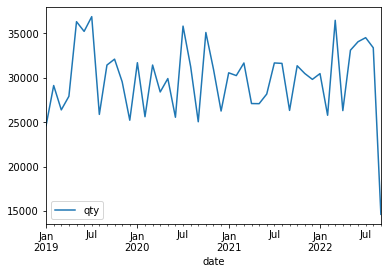

In [40]:
df_sales.resample('M').sum().plot()

In [42]:
# per 6 bulan
df_sales.resample('6M').sum()

,qty
date,
2019-01-31,24617
2019-07-31,191847
2020-01-31,175872
2020-07-31,176732
2021-01-31,179187
2021-07-31,175928
2022-01-31,180068
2022-07-31,190226
2023-01-31,48005


<AxesSubplot:xlabel='date'>

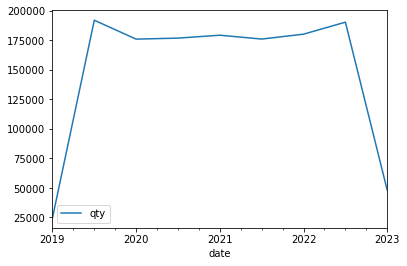

In [43]:
df_sales.resample('6M').sum().plot()

In [46]:
# rolling sum
# bikin sum untuk bbrp baris ke belakang

df_sales["rolling 3"] = df_sales.rolling(3).sum()
df_sales

,qty,rolling 3
date,,
2019-01-01,1635,NaN
2019-01-02,177,NaN
2019-01-03,307,2119.0
2019-01-04,1388,1872.0
2019-01-05,172,1867.0
...,...,...
2022-09-10,1268,3394.0
2022-09-11,1586,4167.0
2022-09-12,291,3145.0


In [48]:
# mau buat rolling sum per 3 bulan?
# siapin dulu datanya jadi per bulan baru di rolling sum
df_sales_monthly = df_sales.resample('M').sum()
df_sales_monthly["rolling 3"] = df_sales_monthly["qty"].rolling(3).sum()
df_sales_monthly

,qty,rolling 3
date,,
2019-01-31,24617,NaN
2019-02-28,29128,NaN
2019-03-31,26385,80130.0
2019-04-30,27914,83427.0
2019-05-31,36316,90615.0
2019-06-30,35222,99452.0
2019-07-31,36882,108420.0
2019-08-31,25876,97980.0
2019-09-30,31431,94189.0


In [49]:
df_sales_monthly["rolling 3 backfilled"] = df_sales_monthly["rolling 3"].fillna(method="backfill")
df_sales_monthly

,qty,rolling 3,rolling 3 backfilled
date,,,
2019-01-31,24617,NaN,80130.0
2019-02-28,29128,NaN,80130.0
2019-03-31,26385,80130.0,80130.0
2019-04-30,27914,83427.0,83427.0
2019-05-31,36316,90615.0,90615.0
2019-06-30,35222,99452.0,99452.0
2019-07-31,36882,108420.0,108420.0
2019-08-31,25876,97980.0,97980.0
2019-09-30,31431,94189.0,94189.0


# Case Study
kita akan gunakan data "opsd_germany_daily.csv" data tentang penggunaan energi di Jerman

kita mau analisa apakah ada kebiasaan tertentu dalam penggunaan energi disana.

In [52]:
df_energy = pd.read_csv("opsd_germany_daily.csv")

df_energy_copy = df_energy.copy()

df_energy

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.18400,NaN,NaN,NaN
1,2006-01-02,1380.52100,NaN,NaN,NaN
2,2006-01-03,1442.53300,NaN,NaN,NaN
3,2006-01-04,1457.21700,NaN,NaN,NaN
4,2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...,...
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714


In [53]:
# cek info() apakah sudah rapi
df_energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         4383 non-null   object 
 1   Consumption  4383 non-null   float64
 2   Wind         2920 non-null   float64
 3   Solar        2188 non-null   float64
 4   Wind+Solar   2187 non-null   float64
dtypes: float64(4), object(1)
memory usage: 171.3+ KB


In [54]:
# convert dulu tanggal jadi datetime
df_energy["Date"] = pd.to_datetime(df_energy["Date"])
df_energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         4383 non-null   datetime64[ns]
 1   Consumption  4383 non-null   float64       
 2   Wind         2920 non-null   float64       
 3   Solar        2188 non-null   float64       
 4   Wind+Solar   2187 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 171.3 KB


In [55]:
# kita jadikan kolom Date sebagai index
df_energy = df_energy.set_index("Date")
df_energy

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.18400,NaN,NaN,NaN
2006-01-02,1380.52100,NaN,NaN,NaN
2006-01-03,1442.53300,NaN,NaN,NaN
2006-01-04,1457.21700,NaN,NaN,NaN
2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037
2017-12-28,1299.86398,506.424,14.162,520.586
2017-12-29,1295.08753,584.277,29.854,614.131


<AxesSubplot:xlabel='Date'>

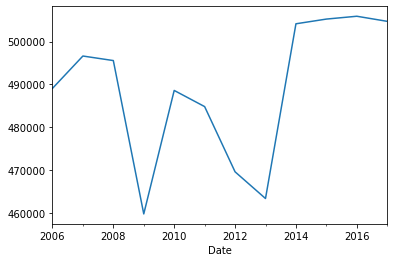

In [73]:
# misal kita mau lihat trend pemakaian listrik per tahun

df_energy_yearly = df_energy.resample("Y").sum()

df_energy_yearly["Consumption"].plot()

In [74]:
df_energy_yearly["Consumption"].agg(["min", "max"])

min    459737.428
max    505927.354
Name: Consumption, dtype: float64

In [76]:
# pending
# df_energy_yearly["Consumption"].plot()
# plt.ylim([45000, 51000])
# plt.show()

<AxesSubplot:xlabel='Date'>

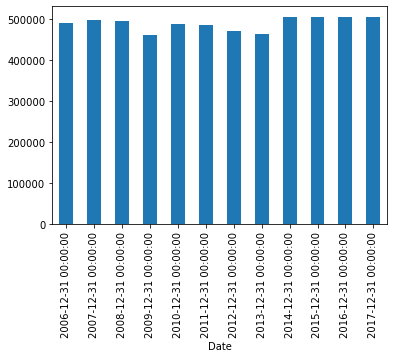

In [59]:
df_energy_yearly["Consumption"].plot(kind="bar")

<AxesSubplot:xlabel='Date'>

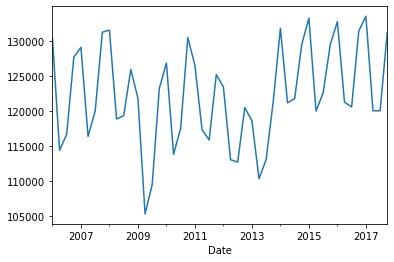

In [77]:
# kita bisa set ke beda interval kalau mau

df_energy_resampled = df_energy.resample("Q").sum()

df_energy_resampled["Consumption"].plot()

<AxesSubplot:xlabel='Date'>

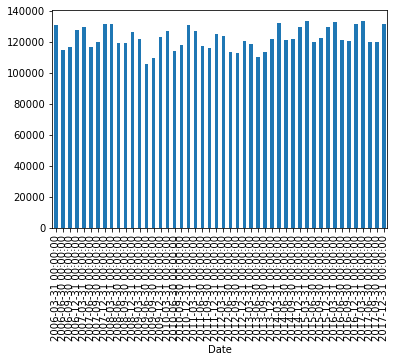

In [78]:
df_energy_resampled["Consumption"].plot(kind="bar")

In [81]:
# kita bisa lihat per bulan juga

df_energy_resampled = df_energy.resample("M").sum()

df_energy_resampled["Consumption"].head()

Date
2006-01-31    45304.704
2006-02-28    41078.993
2006-03-31    43978.124
2006-04-30    38251.767
2006-05-31    38858.143
Freq: M, Name: Consumption, dtype: float64

In [83]:
len(df_energy_resampled["Consumption"])

144

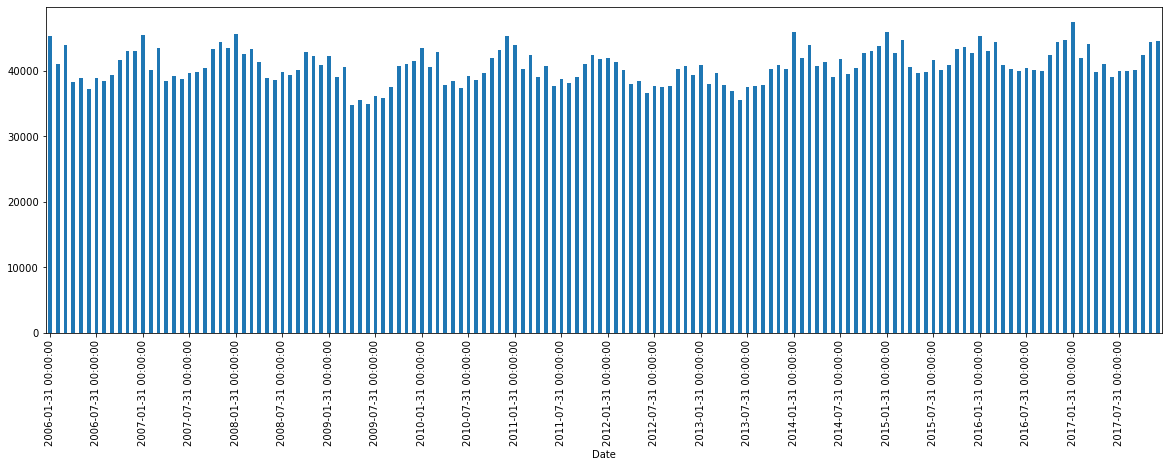

In [84]:
df_energy_resampled["Consumption"].plot(kind="bar", figsize=(20,6))

plt.xticks(range(0, 144, 6))

plt.show()

In [86]:
# ambil data 2 tahun saja, misalnya 2007-2009

df_0709_monthly = df_energy_resampled[
    (df_energy_resampled.index.year >= 2007) & 
    (df_energy_resampled.index.year <= 2009)
    ]
df_0709_monthly

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2007-01-31,45478.799,0.0,0.0,0.0
2007-02-28,40165.562,0.0,0.0,0.0
2007-03-31,43428.206,0.0,0.0,0.0
2007-04-30,38403.995,0.0,0.0,0.0
2007-05-31,39228.516,0.0,0.0,0.0
2007-06-30,38724.862,0.0,0.0,0.0
2007-07-31,39715.162,0.0,0.0,0.0
2007-08-31,39821.185,0.0,0.0,0.0
2007-09-30,40435.725,0.0,0.0,0.0


<AxesSubplot:xlabel='Date'>

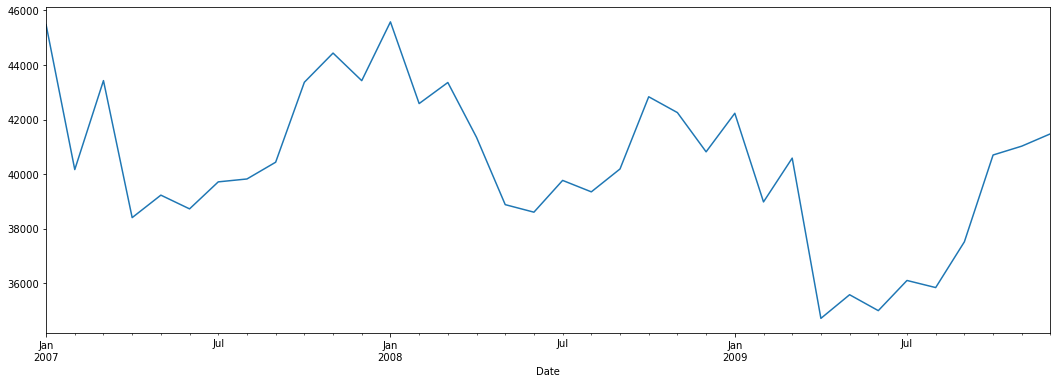

In [98]:
df_0709_monthly["Consumption"].plot(figsize=(18,6))

sepertinya pemakaian listrik naik di sekitar bulan Jan, dan paling sedikit di sekitar bulan Jul

<AxesSubplot:xlabel='Date'>

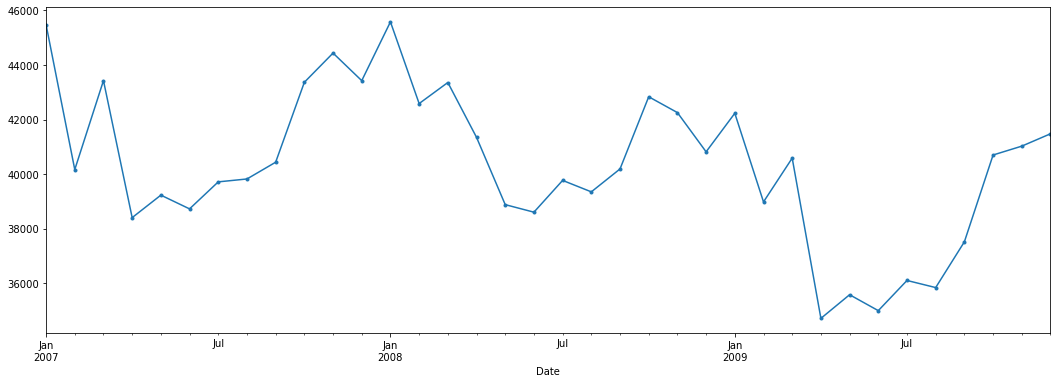

In [99]:
df_0709_monthly["Consumption"].plot(figsize=(18,6), marker=".")

<AxesSubplot:xlabel='Date'>

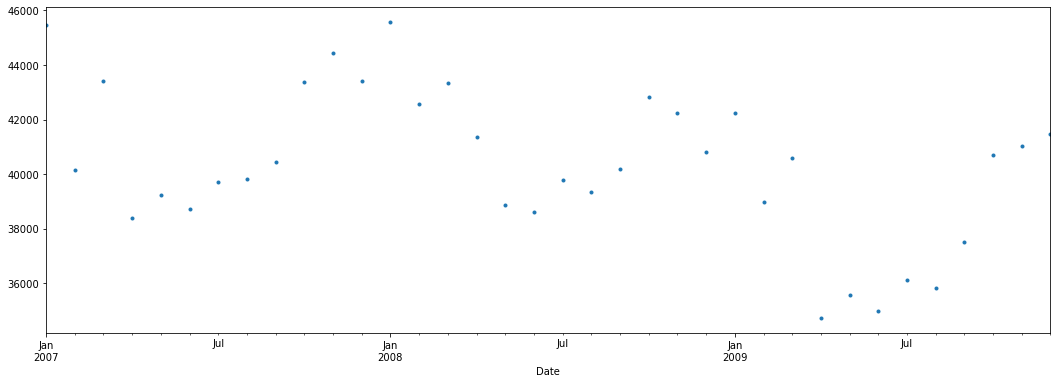

In [101]:
df_0709_monthly["Consumption"].plot(figsize=(18,6), marker=".", linestyle='None')

<AxesSubplot:xlabel='Date'>

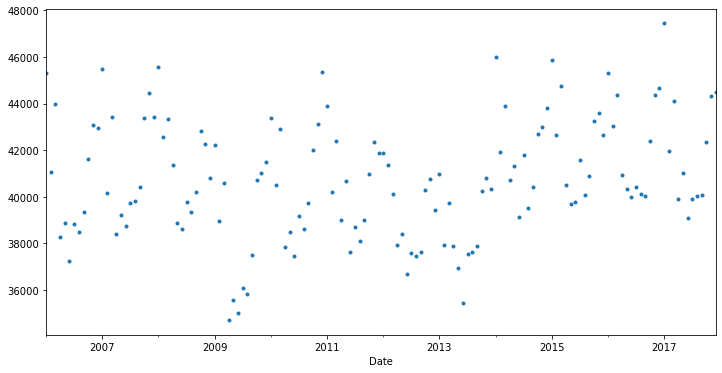

In [106]:
df_energy_monthly = df_energy.resample("M").sum()

df_energy_monthly["Consumption"].plot(figsize=(12,6), marker=".", linestyle='None')

<AxesSubplot:xlabel='Date'>

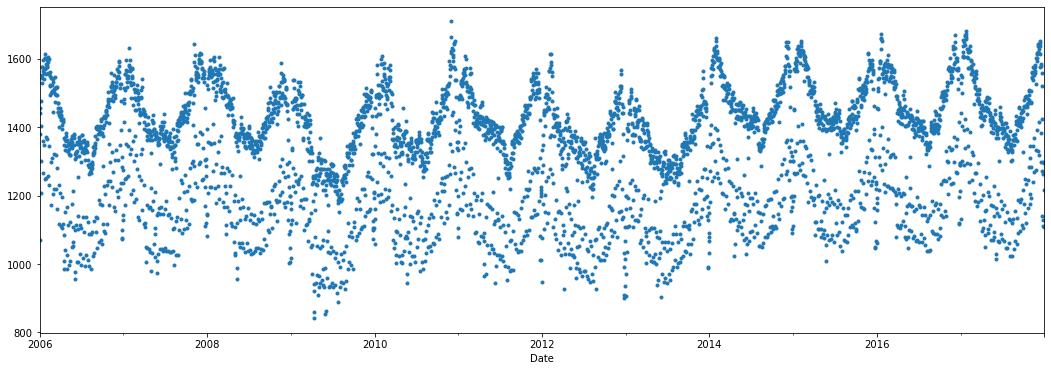

In [107]:
df_energy["Consumption"].plot(figsize=(18,6), marker=".", linestyle='None')

([<matplotlib.axis.XTick at 0x12b112f5af0>,
 [Text(0, 0, '2006-01-01 00:00:00'),
  Text(1, 0, '2006-01-02 00:00:00'),
  Text(2, 0, '2006-01-03 00:00:00'),
  Text(3, 0, '2006-01-04 00:00:00'),
  Text(4, 0, '2006-01-05 00:00:00'),
  Text(5, 0, '2006-01-06 00:00:00'),
  Text(6, 0, '2006-01-07 00:00:00'),
  Text(7, 0, '2006-01-08 00:00:00'),
  Text(8, 0, '2006-01-09 00:00:00'),
  Text(9, 0, '2006-01-10 00:00:00'),
  Text(10, 0, '2006-01-11 00:00:00'),
  Text(11, 0, '2006-01-12 00:00:00'),
  Text(12, 0, '2006-01-13 00:00:00'),
  Text(13, 0, '2006-01-14 00:00:00'),
  Text(14, 0, '2006-01-15 00:00:00'),
  Text(15, 0, '2006-01-16 00:00:00'),
  Text(16, 0, '2006-01-17 00:00:00'),
  Text(17, 0, '2006-01-18 00:00:00'),
  Text(18, 0, '2006-01-19 00:00:00'),
  Text(19, 0, '2006-01-20 00:00:00'),
  Text(20, 0, '2006-01-21 00:00:00'),
  Text(21, 0, '2006-01-22 00:00:00'),
  Text(22, 0, '2006-01-23 00:00:00'),
  Text(23, 0, '2006-01-24 00:00:00'),
  Text(24, 0, '2006-01-25 00:00:00')])

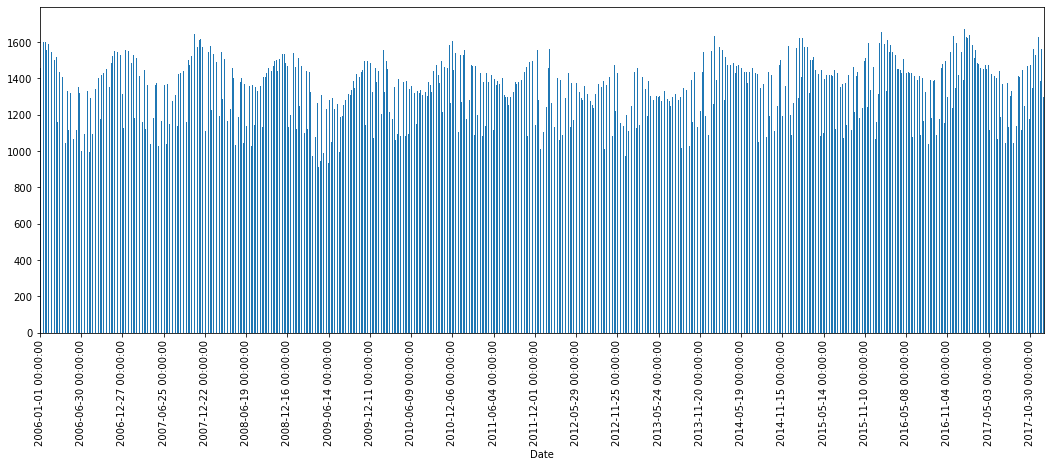

In [112]:
df_energy["Consumption"].plot(figsize=(18,6), kind="bar")

plt.xticks(range(0, len(df_energy), 180))

<AxesSubplot:>

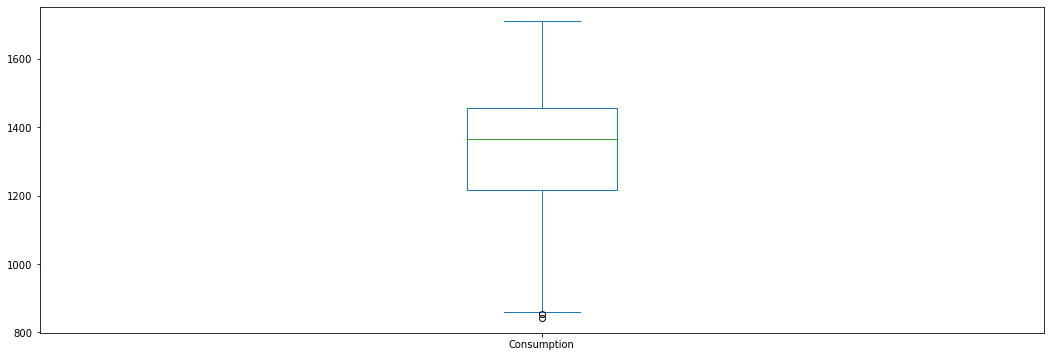

In [113]:
# box plot

df_energy["Consumption"].plot(figsize=(18,6), kind="box")

In [114]:
# kita bisa grup datanya per bulan baru kita buat boxplot untuk 1 box setiap bulan

df_energy["month"] = df_energy.index.month
df_energy.head()

,Consumption,Wind,Solar,Wind+Solar,month
Date,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,1
2006-01-02,1380.521,NaN,NaN,NaN,1
2006-01-03,1442.533,NaN,NaN,NaN,1
2006-01-04,1457.217,NaN,NaN,NaN,1
2006-01-05,1477.131,NaN,NaN,NaN,1


In [115]:
df_permonth = df_energy.groupby("month")["Consumption"].sum()
df_permonth

month
1     533366.69400
2     492385.24200
3     513618.35300
4     467444.75200
5     469428.68400
6     454741.02300
7     471213.06500
8     464996.77368
9     473165.53792
10    502723.25393
11    513069.18955
12    511263.61931
Name: Consumption, dtype: float64

<AxesSubplot:title={'center':'Consumption'}, xlabel='[month]'>

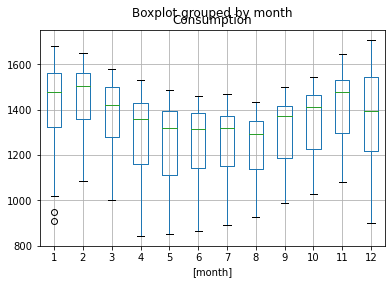

In [116]:
# groupby nya langsung dari si boxplot

df_energy.boxplot(column=["Consumption"], by=["month"])

In [117]:
# kita bisa lihat per hari


df_energy["weekday"] = df_energy.index.weekday
df_energy.head()

,Consumption,Wind,Solar,Wind+Solar,month,weekday
Date,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,1,6
2006-01-02,1380.521,NaN,NaN,NaN,1,0
2006-01-03,1442.533,NaN,NaN,NaN,1,1
2006-01-04,1457.217,NaN,NaN,NaN,1,2
2006-01-05,1477.131,NaN,NaN,NaN,1,3


<AxesSubplot:title={'center':'Consumption'}, xlabel='[weekday]'>

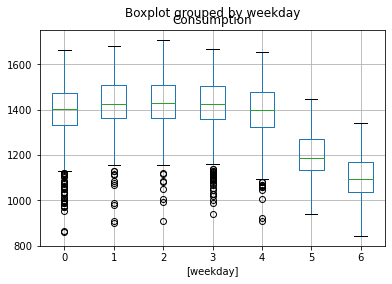

In [118]:

df_energy.boxplot(column=["Consumption"], by=["weekday"])